In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'full_data_monthly_v2022_2011_2020_10.nc.gz'

In [3]:
data = xr.open_dataset(file_path)

In [4]:
header_content = data.__str__()
print(header_content)


<xarray.Dataset>
Dimensions:                       (lon: 360, lat: 180, time: 120)
Coordinates:
  * lon                           (lon) float64 -179.5 -178.5 ... 178.5 179.5
  * lat                           (lat) float64 89.5 88.5 87.5 ... -88.5 -89.5
  * time                          (time) datetime64[ns] 2011-01-01 ... 2020-1...
Data variables:
    precip                        (time, lat, lon) float32 ...
    numgauge                      (time, lat, lon) float32 ...
    infilled_numgauges            (time, lat, lon) float32 ...
    interpolation_error           (time, lat, lon) float32 ...
    interpolation_error_infilled  (time, lat, lon) float32 ...
    diff_new_old_method           (time, lat, lon) float32 ...
Attributes: (12/20)
    CDI:                       Climate Data Interface version 1.7.0 (http://m...
    Conventions:               CF-1.4
    history:                   Sat May 28 08:56:58 2022: cdo -setgatts,gattfi...
    title:                     GPCC Full Data Monthl

In [5]:
variable = data['precip']
print(variable)

<xarray.DataArray 'precip' (time: 120, lat: 180, lon: 360)>
[7776000 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
Attributes:
    long_name:  gpcc full data monthly product version 2022, precipitation pe...
    units:      mm/month
    code:       20


In [6]:
grouped_E = variable.groupby('time')
for time, variable in grouped_E:
    print(f"{time}")

2011-01-01T00:00:00.000000000
2011-02-01T00:00:00.000000000
2011-03-01T00:00:00.000000000
2011-04-01T00:00:00.000000000
2011-05-01T00:00:00.000000000
2011-06-01T00:00:00.000000000
2011-07-01T00:00:00.000000000
2011-08-01T00:00:00.000000000
2011-09-01T00:00:00.000000000
2011-10-01T00:00:00.000000000
2011-11-01T00:00:00.000000000
2011-12-01T00:00:00.000000000
2012-01-01T00:00:00.000000000
2012-02-01T00:00:00.000000000
2012-03-01T00:00:00.000000000
2012-04-01T00:00:00.000000000
2012-05-01T00:00:00.000000000
2012-06-01T00:00:00.000000000
2012-07-01T00:00:00.000000000
2012-08-01T00:00:00.000000000
2012-09-01T00:00:00.000000000
2012-10-01T00:00:00.000000000
2012-11-01T00:00:00.000000000
2012-12-01T00:00:00.000000000
2013-01-01T00:00:00.000000000
2013-02-01T00:00:00.000000000
2013-03-01T00:00:00.000000000
2013-04-01T00:00:00.000000000
2013-05-01T00:00:00.000000000
2013-06-01T00:00:00.000000000
2013-07-01T00:00:00.000000000
2013-08-01T00:00:00.000000000
2013-09-01T00:00:00.000000000
2013-10-01

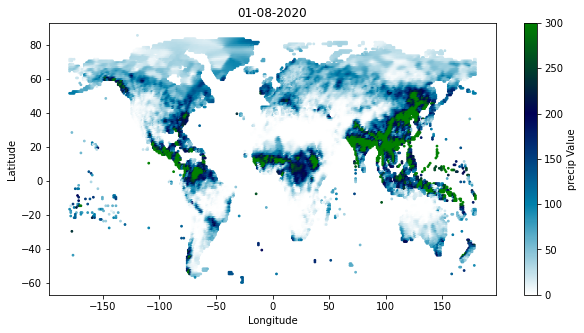

In [35]:
eva = data['precip'].sel(time='2020-08-01T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 5))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='ocean_r', vmin=0, vmax=300, s=3)
plt.colorbar(label='precip Value')
plt.title('01-08-2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

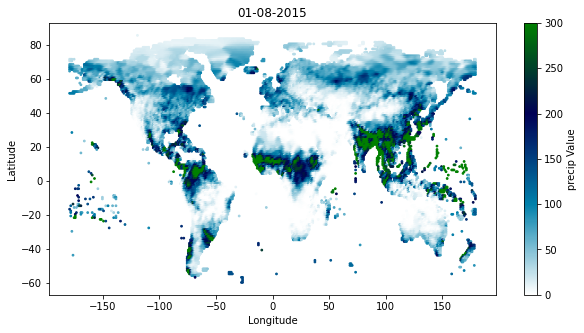

In [33]:
eva = data['precip'].sel(time='2015-08-01T00:00:00.000000000')
lat = eva['lat'].values
lon = eva['lon'].values
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
variable = eva.values

fig = plt.figure(figsize=(10, 5))
plt.scatter(lon_mesh.flatten(), lat_mesh.flatten(), c=variable.flatten(), cmap='ocean_r',  vmin=0, vmax=300, s=3)
plt.colorbar(label='precip Value')
plt.title('01-08-2015')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()